<h1>Data Science Capstone Assignment</h1>

In [1]:
!pip install bs4
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [2]:
CLIENT_ID = 'MH5NCUXRK0SVDC2I45KYIQ3GVSB0AONXJCEGBS0NG31TU12H' 
CLIENT_SECRET = 'B4H3QD4UW0H2EAIJ3PZB2XWW335K1Q1RDIHIV32WD3E4Q5O1' 
VERSION = '20180605'

In [8]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
url = 'https://www.nriol.com/india-statistics/tamilnadu/districts.asp'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find('table')
fields=tables.find_all("td")

In [10]:
fields

[<td>1</td>,
 <td>Ariyalur</td>,
 <td>1,949.31</td>,
 <td>754,894</td>,
 <td>Ariyalur</td>,
 <td>2</td>,
 <td>Chennai</td>,
 <td>175</td>,
 <td>4,646,732</td>,
 <td>Chennai</td>,
 <td>3</td>,
 <td>Coimbatore</td>,
 <td>4,723</td>,
 <td>3,458,045</td>,
 <td>Coimbatore</td>,
 <td>4</td>,
 <td>Cuddalore</td>,
 <td>3,678</td>,
 <td>2,605,914</td>,
 <td>Cuddalore</td>,
 <td>5</td>,
 <td>Dharmapuri</td>,
 <td>4,497.77</td>,
 <td>1,506,843</td>,
 <td>Dharmapuri</td>,
 <td>6</td>,
 <td>Dindigul</td>,
 <td>6,266.64</td>,
 <td>2,159,775</td>,
 <td>Dindigul</td>,
 <td>7</td>,
 <td>Erode</td>,
 <td>4,723</td>,
 <td>2,251,744</td>,
 <td>Erode</td>,
 <td>8</td>,
 <td>Kallakurichi</td>,
 <td>11.69</td>,
 <td>1,57,628</td>,
 <td>Kallakurichi</td>,
 <td>9</td>,
 <td>Kanchipuram</td>,
 <td>4,393</td>,
 <td>3,998,252</td>,
 <td>Kanchipuram</td>,
 <td>10</td>,
 <td>Kanniyakumari</td>,
 <td>1,672</td>,
 <td>1,870,374</td>,
 <td>Nagercoil</td>,
 <td>11</td>,
 <td>Karur</td>,
 <td>2,895.57</td>,
 <td>1,064,4

In [30]:
District = []
Area = []
Population=[]


for i in range(0, len(fields),5):
    District.append(fields[i+1].text.strip())
    Area.append(fields[i+2].text.strip())
    Population.append(fields[i+3].text.strip())

In [31]:
District

['Ariyalur',
 'Chennai',
 'Coimbatore',
 'Cuddalore',
 'Dharmapuri',
 'Dindigul',
 'Erode',
 'Kallakurichi',
 'Kanchipuram',
 'Kanniyakumari',
 'Karur',
 'Krishnagiri',
 'Madurai',
 'Nagapattinam',
 'Namakkal',
 'Nilgiris',
 'Perambalur',
 'Pudukkottai',
 'Ramanathapuram',
 'Salem',
 'Sivaganga',
 'Thanjavur',
 'Theni',
 'Thoothukudi',
 'Tiruchirappalli',
 'Tirunelveli',
 'Tiruppur',
 'Tiruvallur',
 'Tiruvannamalai',
 'Tiruvarur',
 'Vellore',
 'Viluppuram',
 'Virudhunagar']

In [32]:
Area

['1,949.31',
 '175',
 '4,723',
 '3,678',
 '4,497.77',
 '6,266.64',
 '4,723',
 '11.69',
 '4,393',
 '1,672',
 '2,895.57',
 '5,143',
 '3,741.73',
 '2,715.83',
 '3,363',
 '2,452.5',
 '1,757',
 '4,663',
 '4,089.57',
 '5,205',
 '4,086',
 '3,396.57',
 '3,066',
 '4,621',
 '4,407',
 '6,810',
 '5,186.34',
 '3,424',
 '6,191',
 '2,161',
 '6,077',
 '7,217',
 '4,288']

In [33]:
Population

['754,894',
 '4,646,732',
 '3,458,045',
 '2,605,914',
 '1,506,843',
 '2,159,775',
 '2,251,744',
 '1,57,628',
 '3,998,252',
 '1,870,374',
 '1,064,493',
 '1,879,809',
 '3,038,252',
 '1,616,450',
 '1,726,601',
 '735,394',
 '565,223',
 '1,618,345',
 '1,353,445',
 '3,482,056',
 '1,339,101',
 '2,405,890',
 '1,245,899',
 '1,750,176',
 '2,722,290',
 '3,077,233',
 '2,479,052',
 '3,728,104',
 '2,464,875',
 '1,264,277',
 '3,936,331',
 '3,458,873',
 '2,105,930']

In [37]:
df = pd.DataFrame(data=[District,Area,Population]).transpose()

<h1>Dataframe formed from the data webscrapped from the official NRIO website</h1>

In [38]:
df

,0,1,2
0,Ariyalur,"1,949.31","754,894"
1,Chennai,175,"4,646,732"
2,Coimbatore,"4,723","3,458,045"
3,Cuddalore,"3,678","2,605,914"
4,Dharmapuri,"4,497.77","1,506,843"
5,Dindigul,"6,266.64","2,159,775"
6,Erode,"4,723","2,251,744"
7,Kallakurichi,11.69,"1,57,628"
8,Kanchipuram,"4,393","3,998,252"
9,Kanniyakumari,"1,672","1,870,374"


In [39]:
df.columns=['Name of District','Area(sq km)','Population']
df.head()

,Name of District,Area(sq km),Population
0,Ariyalur,"1,949.31","754,894"
1,Chennai,175,"4,646,732"
2,Coimbatore,"4,723","3,458,045"
3,Cuddalore,"3,678","2,605,914"
4,Dharmapuri,"4,497.77","1,506,843"


In [40]:
df.dtypes

Name of District    object
Area(sq km)         object
Population          object
dtype: object

In [48]:
df['Area(sq km)']=df['Area(sq km)'].str.replace(",","")
df['Population']=df['Population'].str.replace(",","")

In [50]:
df[['Area(sq km)','Population']]=df[['Area(sq km)','Population']].astype('float64')

In [52]:
df.head()

,Name of District,Area(sq km),Population
0,Ariyalur,1949.31,754894.0
1,Chennai,175.00,4646732.0
2,Coimbatore,4723.00,3458045.0
3,Cuddalore,3678.00,2605914.0
4,Dharmapuri,4497.77,1506843.0


<h1>Dataframe formed from the data webscrapped from the official NRIO website with the latitude and longitude details from thr Nominatin function</h1>

In [54]:
Latitude=[]
Longitude=[]
for i in range(0,df.shape[0]):
    geolocator=Nominatim(user_agent="Shreebuvan")
    location = geolocator.geocode(df["Name of District"].iloc[i])
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
Latitude=pd.DataFrame(Latitude)
Longitude=pd.DataFrame(Longitude)
df[["Latitude"]]=Latitude
df[["Longitude"]]=Longitude
df

,Name of District,Area(sq km),Population,Latitude,Longitude
0,Ariyalur,1949.31,754894.0,11.076036,79.117455
1,Chennai,175.00,4646732.0,13.080172,80.283833
2,Coimbatore,4723.00,3458045.0,11.001812,76.962842
3,Cuddalore,3678.00,2605914.0,11.742694,79.750306
4,Dharmapuri,4497.77,1506843.0,12.096805,78.193043
5,Dindigul,6266.64,2159775.0,10.330330,78.067398
6,Erode,4723.00,2251744.0,11.369204,77.676627
7,Kallakurichi,11.69,157628.0,11.794685,79.038821
8,Kanchipuram,4393.00,3998252.0,12.964716,79.983969
9,Kanniyakumari,1672.00,1870374.0,8.087964,77.546741


In [61]:
df_density=df['Population']/df['Area(sq km)']
df_density.index=df['Name of District']
df_density

Name of District
Ariyalur             387.262159
Chennai            26552.754286
Coimbatore           732.171289
Cuddalore            708.513866
Dharmapuri           335.020021
Dindigul             344.646413
Erode                476.761380
Kallakurichi       13484.003422
Kanchipuram          910.141589
Kanniyakumari       1118.644737
Karur                367.628135
Krishnagiri          365.508264
Madurai              811.991245
Nagapattinam         595.195576
Namakkal             513.410943
Nilgiris             299.854842
Perambalur           321.697780
Pudukkottai          347.060905
Ramanathapuram       330.950442
Salem                668.982901
Sivaganga            327.729075
Thanjavur            708.329285
Theni                406.359752
Thoothukudi          378.743995
Tiruchirappalli      617.719537
Tirunelveli          451.869750
Tiruppur             477.996429
Tiruvallur          1088.815421
Tiruvannamalai       398.138427
Tiruvarur            585.042573
Vellore              64

<h1>Distribution chart of the population denstity spread accross the various districts in Tamilnadu</h1>

Text(0, 0.5, '')

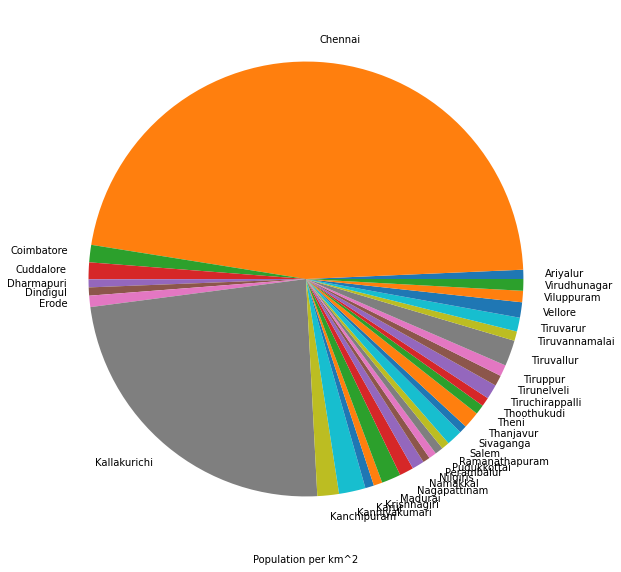

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
df_density.plot(kind='pie',figsize=(10,10))
plt.xlabel('Population per km^2')
plt.ylabel('')

<h1>Data for the available Hospitals in the given radius from the foursquare API</h1>

In [74]:
Results=[]
radius = 5000
LIMIT = 100
categoryId="4bf58dd8d48988d196941735"
for i in range(1,len(df)):
        Name,lat,lon=df[['Name of District','Latitude','Longitude']].iloc[i]
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius,
        categoryId,
        LIMIT)
        Results.append(requests.get(url).json())

In [75]:
Results

[{'meta': {'code': 200, 'requestId': '5f13060b3aed6f3c7ef40cd6'},
  'response': {'groups': [{'items': [{'reasons': {'count': 0,
        'items': [{'reasonName': 'globalInteractionReason',
          'summary': 'This spot is popular',
          'type': 'general'}]},
       'referralId': 'e-0-51ecf8bf498e595e22d17606-0',
       'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
           'suffix': '.png'},
          'id': '4bf58dd8d48988d196941735',
          'name': 'Hospital',
          'pluralName': 'Hospitals',
          'primary': True,
          'shortName': 'Hospital'}],
        'id': '51ecf8bf498e595e22d17606',
        'location': {'address': 'Opp.Chennai Central',
         'cc': 'IN',
         'city': 'Chennai',
         'country': 'India',
         'distance': 792,
         'formattedAddress': ['Opp.Chennai Central',
          'Chennai 600003',
          'Tamil Nadu',
          'India'],
         'labeledLatLngs': [{'label':

In [77]:
venues=[]
for i in range(0,len(Results)):
    results=Results[i]
    venues.extend(results['response']['groups'][0]['items'])

In [78]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [79]:
nearby_hospitals = json_normalize(venues)
nearby_hospitals.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.venuePage.id'],
      dtype='object')

In [90]:
nearby_hospitals['venue.categories'][0]

[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
   'suffix': '.png'},
  'id': '4bf58dd8d48988d196941735',
  'name': 'Hospital',
  'pluralName': 'Hospitals',
  'primary': True,
  'shortName': 'Hospital'}]

<h1>Retrieving only the category name</h1>

In [94]:
#cleaning columns
for i in range(nearby_hospitals.shape[0]):
  nearby_hospitals['venue.categories'].iloc[i]=nearby_hospitals['venue.categories'][i][0]['name']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<h1>Cleaned dataframe </h1>

In [95]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_hospitals =nearby_hospitals.loc[:, filtered_columns]
nearby_hospitals

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Rajiv Gandhi Government General Hospital,Hospital,13.081822,80.276719
1,Apollo Hospitals,Hospital,13.062761,80.251790
2,Dr. U Mohan Rau Memorial Hospital,Hospital,13.079339,80.257258
3,Apollo First Med Hospitals,Hospital,13.077976,80.246140
4,Apollo hospitals,Hospital,13.062767,80.251862
5,Apollo Hospital,Hospital,13.066777,80.252211
6,Kumaran Hospital,Hospital,13.078651,80.249352
7,Apollo Heart Centre,Hospital,13.060618,80.254335
8,Sankara Nethralaya Eye Hospital,Hospital,13.066993,80.250306
9,Shankara Netralaya,Hospital,13.065819,80.250147


<h1>Renaming the columns in the dataframe </h1>

In [131]:
nearby_hospitals.columns = [col.split(".")[-1] for col in nearby_hospitals.columns]

nearby_hospitals.drop_duplicates(inplace=True)
nearby_hospitals=nearby_hospitals.set_index("name")
nearby_hospitals=nearby_hospitals.reset_index()
nearby_hospitals

,name,categories,lat,lng
0,Rajiv Gandhi Government General Hospital,Hospital,13.081822,80.276719
1,Apollo Hospitals,Hospital,13.062761,80.251790
2,Dr. U Mohan Rau Memorial Hospital,Hospital,13.079339,80.257258
3,Apollo First Med Hospitals,Hospital,13.077976,80.246140
4,Apollo hospitals,Hospital,13.062767,80.251862
5,Apollo Hospital,Hospital,13.066777,80.252211
6,Kumaran Hospital,Hospital,13.078651,80.249352
7,Apollo Heart Centre,Hospital,13.060618,80.254335
8,Sankara Nethralaya Eye Hospital,Hospital,13.066993,80.250306
9,Shankara Netralaya,Hospital,13.065819,80.250147


<h1>Data for the available Medical Supply Stores in the given radius from the foursquare API</h1>

In [96]:
Results_medical_supply_store=[]
venues_medical_supply_store=[]
radius = 5000
LIMIT = 100
categoryId="58daa1558bbb0b01f18ec206"
for i in range(1,len(df)):
        Name,lat,lon=df[['Name of District','Latitude','Longitude']].iloc[i]
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius,
        categoryId,
        LIMIT)
        Results_medical_supply_store.append(requests.get(url).json())

In [97]:
Results_medical_supply_store

[{'meta': {'code': 200, 'requestId': '5f130bfe91171b59f72efe60'},
  'response': {'groups': [{'items': [{'reasons': {'count': 0,
        'items': [{'reasonName': 'globalInteractionReason',
          'summary': 'This spot is popular',
          'type': 'general'}]},
       'referralId': 'e-0-5d4d32d85a26220008438f4d-0',
       'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
           'suffix': '.png'},
          'id': '58daa1558bbb0b01f18ec206',
          'name': 'Medical Supply Store',
          'pluralName': 'Medical Supply Stores',
          'primary': True,
          'shortName': 'Medical Supply'}],
        'id': '5d4d32d85a26220008438f4d',
        'location': {'address': 'Harrington Road 2',
         'cc': 'IN',
         'city': 'Chennai',
         'country': 'India',
         'distance': 4759,
         'formattedAddress': ['Harrington Road 2',
          'Chennai 600031',
          'Tamil Nadu',
          'India'],
         '

In [134]:
for i in range(0,len(Results_medical_supply_store)):
    results=Results_medical_supply_store[i]
    venues_medical_supply_store.extend(results['response']['groups'][0]['items'])

In [135]:
nearby_medicalsupply = json_normalize(venues_medical_supply_store)
nearby_medicalsupply.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.venuePage.id', 'venue.location.crossStreet',
       'venue.location.neighborhood'],
      dtype='object')

In [136]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_medicalsupply =nearby_medicalsupply.loc[:, filtered_columns]
nearby_medicalsupply

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Draeger India Private Limited,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",13.068533,80.241600
1,Pacific Medical Supply,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",44.950934,-123.035338
2,Providence Home Medical Equipment - Salem,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",44.916395,-123.027078
3,Beltone Hearing Care Center,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",44.951094,-122.995100
4,Apria Healthcare,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",44.910185,-123.020241
5,Scrubs & Beyond,"[{'id': '58daa1558bbb0b01f18ec206', 'name': 'M...",44.943658,-122.982511
6,Fred Meyer Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",44.968285,-123.030550
7,Boydon Medical,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",44.939856,-123.035873
8,Fred Meyer Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",44.905755,-123.040987
9,Fred Meyer Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",44.948714,-122.986186


<h1>Retrieving only the category name</h1>

In [137]:
#cleaning columns
for i in range(nearby_medicalsupply.shape[0]):
  nearby_medicalsupply['venue.categories'].iloc[i]=nearby_medicalsupply['venue.categories'][i][0]['name']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<h1>Cleaned dataframe </h1>

In [138]:
nearby_medicalsupply

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Draeger India Private Limited,Medical Supply Store,13.068533,80.241600
1,Pacific Medical Supply,Medical Supply Store,44.950934,-123.035338
2,Providence Home Medical Equipment - Salem,Medical Supply Store,44.916395,-123.027078
3,Beltone Hearing Care Center,Medical Supply Store,44.951094,-122.995100
4,Apria Healthcare,Medical Supply Store,44.910185,-123.020241
5,Scrubs & Beyond,Medical Supply Store,44.943658,-122.982511
6,Fred Meyer Pharmacy,Pharmacy,44.968285,-123.030550
7,Boydon Medical,Medical Center,44.939856,-123.035873
8,Fred Meyer Pharmacy,Pharmacy,44.905755,-123.040987
9,Fred Meyer Pharmacy,Pharmacy,44.948714,-122.986186


<h1>Renaming the columns in the dataframe </h1>

In [139]:
nearby_medicalsupply.columns = [col.split(".")[-1] for col in nearby_medicalsupply.columns]

nearby_medicalsupply.drop_duplicates(inplace=True)
nearby_medicalsupply=nearby_medicalsupply.set_index("name")
nearby_medicalsupply=nearby_medicalsupply.reset_index()
nearby_medicalsupply

,name,categories,lat,lng
0,Draeger India Private Limited,Medical Supply Store,13.068533,80.241600
1,Pacific Medical Supply,Medical Supply Store,44.950934,-123.035338
2,Providence Home Medical Equipment - Salem,Medical Supply Store,44.916395,-123.027078
3,Beltone Hearing Care Center,Medical Supply Store,44.951094,-122.995100
4,Apria Healthcare,Medical Supply Store,44.910185,-123.020241
5,Scrubs & Beyond,Medical Supply Store,44.943658,-122.982511
6,Fred Meyer Pharmacy,Pharmacy,44.968285,-123.030550
7,Boydon Medical,Medical Center,44.939856,-123.035873
8,Fred Meyer Pharmacy,Pharmacy,44.905755,-123.040987
9,Fred Meyer Pharmacy,Pharmacy,44.948714,-122.986186


<h1>Data for the available Medical Labs in the given radius from the foursquare API</h1>

In [105]:
Results_medical_labs=[]
venues_medical_labs=[]
radius = 5000
LIMIT = 100
categoryId="4f4531b14b9074f6e4fb0103"
for i in range(1,len(df)):
        Name,lat,lon=df[['Name of District','Latitude','Longitude']].iloc[i]
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius,
        categoryId,
        LIMIT)
        Results_medical_labs.append(requests.get(url).json())

In [106]:
Results_medical_labs

[{'meta': {'code': 200, 'requestId': '5f130c1bbc542b0b9a545bda'},
  'response': {'groups': [{'items': [{'reasons': {'count': 0,
        'items': [{'reasonName': 'globalInteractionReason',
          'summary': 'This spot is popular',
          'type': 'general'}]},
       'referralId': 'e-0-5c04d656535d6f002c3d0b6b-0',
       'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/lab_',
           'suffix': '.png'},
          'id': '4f4531b14b9074f6e4fb0103',
          'name': 'Medical Lab',
          'pluralName': 'Medical Labs',
          'primary': True,
          'shortName': 'Medical Lab'}],
        'id': '5c04d656535d6f002c3d0b6b',
        'location': {'address': 'Parsn Complex , Kodampakkam Road, Chennai-600 006',
         'cc': 'IN',
         'city': 'Chennai',
         'country': 'India',
         'distance': 1259,
         'formattedAddress': ['Parsn Complex , Kodampakkam Road, Chennai-600 006',
          'Chennai 600006',
          'Tam

In [115]:
for i in range(0,len(Results_medical_labs)):
  if Results_medical_labs[i]['meta']['code']!=200:
    results=Results_medical_supply_store[i]
    venues_medical_labs.extend(results['response']['groups'][0]['items'])   

In [117]:
nearby_medical_labs = json_normalize(venues_medical_labs)
nearby_medical_labs.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.postalCode',
       'venue.location.cc', 'venue.location.city', 'venue.location.state',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet'],
      dtype='object')

In [118]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_medical_labs=nearby_medical_labs.loc[:, filtered_columns]
nearby_medical_labs

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,kiomedworld,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.089009,80.276582
1,Premier Health Center,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.079259,80.257644
2,Anderson Diagnostics Lab,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.079122,80.254898
3,Apollo Heart Centre Immigration Checks,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.060726,80.254341
4,Ehrlich Laboratory,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.048591,80.266273
5,R&D Histopathology Lab,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",13.042812,80.261078
6,Accura Diagnostics,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",11.013256,76.966895
7,Saberwal Surgicals,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",11.010440,76.951442
8,ThyroCare,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",11.008856,76.949062
9,Immuno Clinical Services,"[{'id': '4f4531b14b9074f6e4fb0103', 'name': 'M...",11.009766,76.947863


<h1>Retrieving only the category name</h1>

In [119]:
#cleaning columns
for i in range(nearby_medical_labs.shape[0]):
  nearby_medical_labs['venue.categories'].iloc[i]=nearby_medical_labs['venue.categories'][i][0]['name']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<h1>Cleaned dataframe </h1>

In [120]:
nearby_medical_labs

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,kiomedworld,Medical Lab,13.089009,80.276582
1,Premier Health Center,Medical Lab,13.079259,80.257644
2,Anderson Diagnostics Lab,Medical Lab,13.079122,80.254898
3,Apollo Heart Centre Immigration Checks,Medical Lab,13.060726,80.254341
4,Ehrlich Laboratory,Medical Lab,13.048591,80.266273
5,R&D Histopathology Lab,Medical Lab,13.042812,80.261078
6,Accura Diagnostics,Medical Lab,11.013256,76.966895
7,Saberwal Surgicals,Medical Lab,11.010440,76.951442
8,ThyroCare,Medical Lab,11.008856,76.949062
9,Immuno Clinical Services,Medical Lab,11.009766,76.947863


<h1>Renaming the columns in the dataframe </h1>

In [129]:
nearby_medical_labs.columns = [col.split(".")[-1] for col in nearby_medical_labs.columns]

nearby_medical_labs.drop_duplicates(inplace=True)
nearby_medical_labs=nearby_medical_labs.set_index("name")
nearby_medical_labs=nearby_medical_labs.reset_index()
nearby_medical_labs

,name,categories,lat,lng
0,kiomedworld,Medical Lab,13.089009,80.276582
1,Premier Health Center,Medical Lab,13.079259,80.257644
2,Anderson Diagnostics Lab,Medical Lab,13.079122,80.254898
3,Apollo Heart Centre Immigration Checks,Medical Lab,13.060726,80.254341
4,Ehrlich Laboratory,Medical Lab,13.048591,80.266273
5,R&D Histopathology Lab,Medical Lab,13.042812,80.261078
6,Accura Diagnostics,Medical Lab,11.013256,76.966895
7,Saberwal Surgicals,Medical Lab,11.010440,76.951442
8,ThyroCare,Medical Lab,11.008856,76.949062
9,Immuno Clinical Services,Medical Lab,11.009766,76.947863


<h1>Data for the available Emergency centers in the given radius from the foursquare API</h1>

In [121]:
Results_emergency_centers=[]
venues_emergency_centers=[]
radius = 5000
LIMIT = 100
categoryId="4bf58dd8d48988d194941735"
for i in range(1,len(df)):
        Name,lat,lon=df[['Name of District','Latitude','Longitude']].iloc[i]
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius,
        categoryId,
        LIMIT)
        Results_emergency_centers.append(requests.get(url).json())



In [122]:
Results_emergency_centers

[{'meta': {'code': 200, 'requestId': '5f13135b5d26353c72295f8b'},
  'response': {'groups': [{'items': [{'reasons': {'count': 0,
        'items': [{'reasonName': 'globalInteractionReason',
          'summary': 'This spot is popular',
          'type': 'general'}]},
       'referralId': 'e-0-51835c29498e81e41a90f27b-0',
       'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_ems_',
           'suffix': '.png'},
          'id': '4bf58dd8d48988d194941735',
          'name': 'Emergency Room',
          'pluralName': 'Emergency Rooms',
          'primary': True,
          'shortName': 'Emergency Room'}],
        'id': '51835c29498e81e41a90f27b',
        'location': {'cc': 'IN',
         'country': 'India',
         'distance': 2178,
         'formattedAddress': ['India'],
         'labeledLatLngs': [{'label': 'display',
           'lat': 13.061678886413574,
           'lng': 80.27727508544922}],
         'lat': 13.061678886413574,
        

In [123]:
for i in range(0,len(Results_emergency_centers)):
    results=Results_emergency_centers[i]
    venues_emergency_centers.extend(results['response']['groups'][0]['items'])

In [124]:
nearby_emergency_centres = json_normalize(venues_emergency_centers)
nearby_emergency_centres.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.postalCode', 'venue.location.city',
       'venue.location.state', 'venue.location.address'],
      dtype='object')

<h1>Data for the available Emergency centers in the given radius </h1>

In [125]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_emergency_centres =nearby_emergency_centres.loc[:, filtered_columns]
nearby_emergency_centres

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,EMRI,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",13.061679,80.277275
1,Salem Hospital ER,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",44.932509,-123.033359
2,Hearing Rehab Center,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",44.925669,-123.044020
3,Providence Express Care At Home - House Call D...,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",44.917240,-123.028780


<h1>Retrieving only the category name</h1>

In [126]:
#cleaning columns
for i in range(nearby_emergency_centres.shape[0]):
  nearby_emergency_centres['venue.categories'].iloc[i]=nearby_emergency_centres['venue.categories'][i][0]['name']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<h1>Cleaned dataframe </h1>

In [127]:
nearby_emergency_centres

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,EMRI,Emergency Room,13.061679,80.277275
1,Salem Hospital ER,Emergency Room,44.932509,-123.033359
2,Hearing Rehab Center,Emergency Room,44.925669,-123.044020
3,Providence Express Care At Home - House Call D...,Emergency Room,44.917240,-123.028780


<h1>Renaming the columns in the dataframe </h1>

In [128]:
nearby_emergency_centres.columns = [col.split(".")[-1] for col in nearby_emergency_centres.columns]

nearby_emergency_centres.drop_duplicates(inplace=True)
nearby_emergency_centres=nearby_emergency_centres.set_index("name")
nearby_emergency_centres=nearby_emergency_centres.reset_index()
nearby_emergency_centres

,name,categories,lat,lng
0,EMRI,Emergency Room,13.061679,80.277275
1,Salem Hospital ER,Emergency Room,44.932509,-123.033359
2,Hearing Rehab Center,Emergency Room,44.925669,-123.044020
3,Providence Express Care At Home - House Call D...,Emergency Room,44.917240,-123.028780


<h1>Merging data for the available Hospitals, Medical Supply, Medical Labs, Emergency centers in the given radius </h1>

In [140]:
df_Tamilnadu_Health_Centers = pd.concat([nearby_hospitals, nearby_medicalsupply, nearby_medical_labs,nearby_emergency_centres], ignore_index=True)
df_Tamilnadu_Health_Centers

,name,categories,lat,lng
0,Rajiv Gandhi Government General Hospital,Hospital,13.081822,80.276719
1,Apollo Hospitals,Hospital,13.062761,80.251790
2,Dr. U Mohan Rau Memorial Hospital,Hospital,13.079339,80.257258
3,Apollo First Med Hospitals,Hospital,13.077976,80.246140
4,Apollo hospitals,Hospital,13.062767,80.251862
5,Apollo Hospital,Hospital,13.066777,80.252211
6,Kumaran Hospital,Hospital,13.078651,80.249352
7,Apollo Heart Centre,Hospital,13.060618,80.254335
8,Sankara Nethralaya Eye Hospital,Hospital,13.066993,80.250306
9,Shankara Netralaya,Hospital,13.065819,80.250147


In [142]:
address = 'Tamilnadu, India'

geolocator = Nominatim(user_agent="tamilnadu_shree")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tamilnadu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tamilnadu are 10.9094334, 78.3665347.


<h1>Map for the available Hospitals, Medical Labs, Medical Supply, Emergency centers in the given radius </h1>

In [146]:
Tamilnadu_map = folium.Map(location=[latitude,longitude], zoom_start=7)

for lat, lng, name, categories in zip(df_Tamilnadu_Health_Centers['lat'], df_Tamilnadu_Health_Centers['lng'],df_Tamilnadu_Health_Centers['name'], df_Tamilnadu_Health_Centers['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Tamilnadu_map)  
    
Tamilnadu_map

<h1>Map for the available Hospitals in the given radius </h1>

In [147]:
Tamilnadu_map = folium.Map(location=[latitude, longitude], zoom_start=7)

for lat, lng, name, categories in zip(nearby_hospitals['lat'], nearby_hospitals['lng'],nearby_hospitals['name'], nearby_hospitals['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(Tamilnadu_map)  
    
Tamilnadu_map

<h1>Map for the available Medical Supply in the given radius </h1>

In [156]:
Tamilnadu_map = folium.Map(location=[latitude, longitude], zoom_start=7)

for lat, lng, name, categories in zip(nearby_medicalsupply['lat'], nearby_medicalsupply['lng'],nearby_medicalsupply['name'], nearby_medicalsupply['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Tamilnadu_map)  
    
Tamilnadu_map

<h1>Map for the available Medical Labs in the given radius </h1>

In [157]:
Tamilnadu_map = folium.Map(location=[latitude, longitude], zoom_start=7)

for lat, lng, name, categories in zip(nearby_medical_labs['lat'], nearby_medical_labs['lng'],nearby_medical_labs['name'], nearby_medical_labs['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(Tamilnadu_map)  
    
Tamilnadu_map

<h1>Map for the available Emergency centers in the given radius </h1>

In [150]:
Tamilnadu_map = folium.Map(location=[latitude, longitude], zoom_start=7)

for lat, lng, name, categories in zip(nearby_emergency_centres['lat'], nearby_emergency_centres['lng'],nearby_emergency_centres['name'], nearby_emergency_centres['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(Tamilnadu_map)  
    
Tamilnadu_map

<h1>In the following cells I do the k-means for clustering the Hospitals, MedicalSupply, Medical labs, Emergency_Centers</h1>

In [151]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [152]:
df_kmeans=df_Tamilnadu_Health_Centers

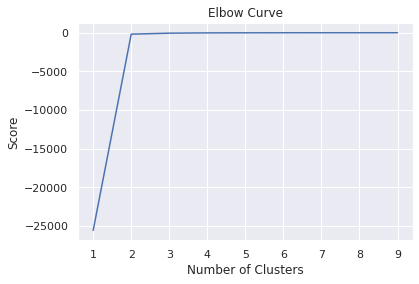

In [153]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_kmeans[['lat']]
X_axis = df_kmeans[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<h2>From the above graph for elbow method 2 clusters is ideal</h2>

In [155]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(df_kmeans[df_kmeans.columns[3:5]]) # Compute k-means clustering.
df_kmeans['cluster_label'] = kmeans.fit_predict(df_kmeans[df_kmeans.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_kmeans[df_kmeans.columns[2:4]]) # Labels of each point
df_kmeans

,name,categories,lat,lng,cluster_label
0,Rajiv Gandhi Government General Hospital,Hospital,13.081822,80.276719,0
1,Apollo Hospitals,Hospital,13.062761,80.251790,0
2,Dr. U Mohan Rau Memorial Hospital,Hospital,13.079339,80.257258,0
3,Apollo First Med Hospitals,Hospital,13.077976,80.246140,0
4,Apollo hospitals,Hospital,13.062767,80.251862,0
5,Apollo Hospital,Hospital,13.066777,80.252211,0
6,Kumaran Hospital,Hospital,13.078651,80.249352,0
7,Apollo Heart Centre,Hospital,13.060618,80.254335,0
8,Sankara Nethralaya Eye Hospital,Hospital,13.066993,80.250306,0
9,Shankara Netralaya,Hospital,13.065819,80.250147,0


<h1>Cluster number is added to all the categories and the motive of this capstone project comes to an end</h1>